# Parallel KMeans implementation
Based on J. Y. Q. H. Z. W. a. J. C. Bowen Wang, “Parallelizing K-means-based Clustering on Spark,” International Conference on Advanced Cloud and Big Data, 2016. 

## Parallel partition based algorithm outline
1. Initialize centroids by randomly selecting k points from the data set. Broadcast selected centroids to all nodes
1. While centrodis still changing:
    1. For each partition do locally:
        1. For each point in partition:
            1. Compute distance to all centroids
            1. Asign closest cluster
        1. For each cluster in partition:
            1. Compute local mean
    1. Compute mean for each cluster for each partition


## Adaptations made to sugested implementation of the algorithm:
1. The authors suggest using SparseVector, with chosen data sets it is better to use regular arrys
1. We use random sample for centroids initialization as described in *Scalable K-Means++* because quality of inital centrods has a major effect on quality
1. We use crisp clustring only i. e. each point can be a member of one cluster only

In [1]:
import random 
from numpy import array
import numpy as np
import matplotlib.pyplot as plt

# For reproducability of results
RANDOM_SEED = 202020

%matplotlib inline

### Import and parse data set

In [2]:
data = sc.textFile("a3.txt")
parsed_data = data.map(lambda line: array([float(x) for x in line.strip().split()]))

parsed_data.take(5)

[array([53920., 42968.]),
 array([52019., 42206.]),
 array([52570., 42476.]),
 array([54220., 42081.]),
 array([54268., 43420.])]

In [3]:
# Store centroids in shared variable, this way all the centroids available localy for each slave
centroids = sc.broadcast(parsed_data.takeSample(False, 50, seed=RANDOM_SEED))

In [18]:
def euclidean_dist(v1, v2):
    return np.linalg.norm(v1-v2)
    
def closest_centroid(point, centroids):
    # for dense data, we use euclidean distance
    centroid_dist_pairs = map(lambda centroid: (centroid, euclidean_dist(point, centroid)), centroids)
    return min(centroid_dist_pairs, key=lambda centroid_dist: centroid_dist[1])

def closest_centroids_partition_processing(partition, centroids):
    print(partition)
    distances = map(lambda point: (point, closest_centroid(point, centroids)), partition)
    return distances

def closest_centroids(data, centroids):
    # returns rdd of tuples (array[x,y], distance to c)
    result = data.mapPartitions(lambda partition: closest_centroids_partition_processing(partition, centroids.value))
    return result

### Distance function test

[40798. 29933.]
[(array([53920., 42968.]), (array([59795., 44489.]), 6068.695576480995)), (array([52019., 42206.]), (array([50193., 49198.]), 7226.502611914009)), (array([52570., 42476.]), (array([50193., 49198.]), 7129.895721537588)), (array([54220., 42081.]), (array([59795., 44489.]), 6072.815574344408)), (array([54268., 43420.]), (array([59795., 44489.]), 5629.430699457984)), (array([52288., 42408.]), (array([50193., 49198.]), 7105.851461999469)), (array([54436., 39727.]), (array([55951., 35172.]), 4800.338529728919)), (array([52391., 44323.]), (array([50193., 49198.]), 5347.600302939628)), (array([54995., 43655.]), (array([59795., 44489.]), 4871.915023889476)), (array([53761., 43403.]), (array([59795., 44489.]), 6130.950334165169))]


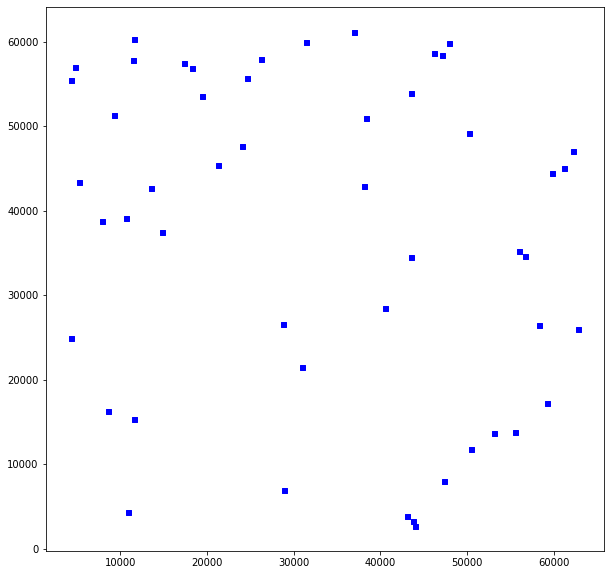

In [19]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

xd, yd = zip(*centroids.value)
test_point = parsed_data.takeSample(False, 1)[0]

print(test_point)

result = closest_centroids(parsed_data, centroids)
print(result.take(10))

ax1.scatter(xd, yd, s=25, c='b', marker="s")
#ax1.scatter([x], [y], s=15, c='r', marker="o")
#ax1.scatter([test_point[0]], [test_point[1]], s=25, c='g', marker="o")

In [ ]:
np.zeros((5,7))

In [ ]:
def pkmeans(data, n, max_iterations=150, stop_distance=0.1):
    # Initiate centroids
    centroids = sc.broadcast(data.takeSample(False, n, seed=RANDOM_SEED))
    iteration_ct = 0
    dist = np.inf
    print(centroids.value)
    
    while dist > stop_distance and iteration_ct < max_iterations:
        # Compute distance between all instaces and all centroids
        for i in range(n):
            
        
        # Update centroids
        iteration_ct += 1

pkmeans(parsed_data, 50)

    